<a href="https://colab.research.google.com/github/reduquette/babbling_language_id/blob/master/babbling_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Imports

In [ ]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

import keras 
import numpy as np 
from keras import models, layers
import tensorflow as tf
import librosa 
import matplotlib.pyplot as plt
import wave
import sys
import os
import librosa.display
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive

Mounted at /content/drive


# Test Opening File (can be skipped)

samples [-0.02442905 -0.0368249  -0.02620145 ... -0.03050421 -0.0366254
 -0.03785028]
sample rate 22050


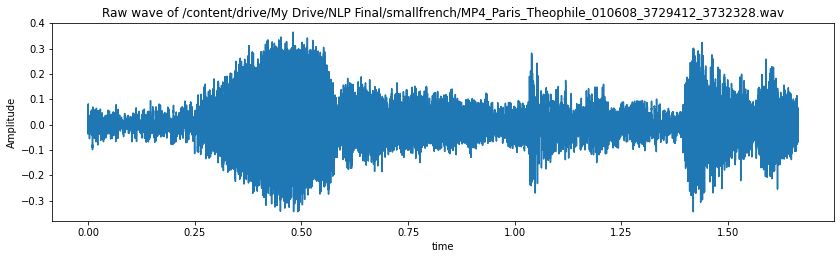

In [ ]:
#test opening and plotting a file 
train_audio_path = '/content/drive/My Drive/NLP Final/'
# Use Librosa to read in the wav file.
# samples, sample_rate = librosa.load(train_audio_path+ 'smallfrench/MP4_Paris_Theophile_010608_3729412_3732328.wav', sr = 16000)
samples, sample_rate = librosa.load(train_audio_path+ 'smallfrench/MP4_Paris_Theophile_010608_2688038_2689702.wav')

print('samples', samples)
print('sample rate', sample_rate)

# Plot the wav file.
fig = plt.figure(figsize=(14, 8))
ax1 = fig.add_subplot(211)
ax1.set_title('Raw wave of ' + train_audio_path + 'smallfrench/MP4_Paris_Theophile_010608_3729412_3732328.wav')
ax1.set_xlabel('time')
ax1.set_ylabel('Amplitude')
ax1.plot(np.linspace(0, len(samples)/sample_rate, len(samples)), samples)

Text(0.5, 1.0, 'Mel spectrogram')

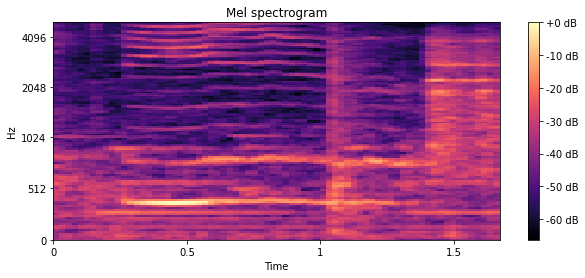

In [ ]:
### Test with one file
spectro = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=5000)
audio_len = len(samples) / sample_rate

plt.figure(figsize=(10, 4))
librosa.display.specshow(librosa.power_to_db(spectro, ref=np.max), y_axis='mel', fmax=5000, x_axis='time')
plt.colorbar(format='%+2.0f dB')
plt.title('Mel spectrogram')

# plt.figure(figsize=(3.841, 7.195), dpi=100)
# ( your code ...)
# plt.savefig('myfig.png', dpi=1000)
#need to save spectrograms with appropriate resolution

# Extract Spectrograms

In [ ]:
#used to extract audio
train_audio_path = '/content/drive/My Drive/NLP Final/'

In [ ]:
label1 = 'smallenglish'
label2 =  'smallfrench'
all_wave = []
all_label = []
english_files = []
french_files = []
eng_pad_spectro = []
modulus = 1
stop = 15000


In [ ]:
#SPLITTING THESE UP INTO SEPARATE GROUPS SO WE SEPARATELY RUN INIT, ENGLISH, FRENCH

# FIRST WE NEED TO PAD - MAKE INPUTS SAME LENGTH
# THEN WE NEED TO MASK - BASICALLY TELL THE MODEL THAT 0s AREN'T REAL DATA

count = 0
maxLen = 0

## ENGLISH
for f in os.listdir(train_audio_path + label1):
  count +=1
  if count%modulus != 0:
    #open every fifth file
    continue 
  if (f.endswith('.wav')):
    #extract audio 
    samples, sample_rate = librosa.load(train_audio_path + '/' + label1 + '/' + f, sr = 16000)
    try:
      #extract spectrogram
      spectro = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=5000)
      
      #wait until spectro is successful to add file name to list
      english_files.append(f)

      #pad spectrogram
      padded_spectro = tf.keras.preprocessing.sequence.pad_sequences(spectro, padding='post', maxlen = 157, dtype = 'float')

      #used to determine maximum length of our audio files: not needed to run 
      # if (spectro.shape[1] > maxLen):
      #   maxLen = spectro.shape[1]

      eng_pad_spectro.append(padded_spectro)
      all_wave.append(samples)
      all_label.append(label1)
    except:
      print('exception:', f)
      count -= 1
    
  if ((count/modulus)%100 == 0):
    print(count/modulus)

  if (count/modulus == stop):
    break


# print('maxLen', maxLen)


100.0
exception: Davis_Rebecca_010417_5154408_5157408.wav
exception: Davis_Rebecca_010404_6258893_6261893.wav
200.0
exception: Davis_Rebecca_010404_7795542_7796656.wav
exception: Davis_Rebecca_010327_4805068_4808068.wav
exception: Davis_Rebecca_010316_4705701_4707820.wav
300.0
exception: Davis_Rebecca_010327_4762670_4765670.wav
400.0
exception: Davis_Rebecca_010414_5172141_5173571.wav
exception: Davis_Rebecca_010414_4503874_4506874.wav
500.0
exception: Davis_Rebecca_010417_3509650_3512650.wav
exception: Davis_Rebecca_010327_5946521_5949521.wav
600.0
exception: Davis_Rebecca_010316_5647823_5650823.wav
700.0
exception: Davis_Rebecca_010414_2276204_2279204.wav
800.0
exception: Davis_Rebecca_010404_7393825_7396825.wav
900.0
exception: Davis_Rebecca_010327_5288232_5290999.wav
1000.0
exception: Davis_Rebecca_010417_3844642_3847642.wav
exception: Davis_Rebecca_010417_7171218_7174218.wav
1100.0
exception: Davis_Rebecca_010404_6162950_6165801.wav
1200.0
exception: Davis_Rebecca_010417_3596866_3

In [ ]:
count = 0
maxLen2 = 0
fre_pad_spectro = []

for f in os.listdir(train_audio_path + label2):
  count += 1

  if count%modulus != 0:
    continue
    #open every fifth file
  if (f.endswith('.wav')):
    #extract audio
    samples, sample_rate = librosa.load(train_audio_path + '/' + label2 + '/' + f, sr = 16000)
    try:
      #create spectrogram
      spectro = librosa.feature.melspectrogram(y=samples, sr=sample_rate, n_mels=128, fmax=5000)
      
      #don't add until spectro is successful
      french_files.append(f)

      #pad spectrograms to the longest shape
      padded_spectro = tf.keras.preprocessing.sequence.pad_sequences(spectro, padding='post', maxlen = 157, dtype = 'float')
      
      fre_pad_spectro.append(padded_spectro)
      all_wave.append(samples)
      all_label.append(label2)

      # if (spectro.shape[1] > maxLen2):
      #   maxLen2 = spectro.shape[1]
    except:
      print('exception:', f)
      count -=1
  if ((count/modulus)%10 == 0):
    print(count/modulus)
  if (count/modulus == stop):
    break


10.0
20.0
exception: MP4_Paris_Madeleine_010005_1195702_1199748.wav
30.0
40.0
50.0
60.0
exception: MP4_Paris_Madeleine_010005_1211312_1215185.wav
70.0
80.0
90.0
exception: MP4_Paris_Madeleine_010005_2454484_2458884.wav
90.0
100.0
110.0
exception: MP4_Paris_Madeleine_010005_2692698_2697254.wav
110.0
120.0
exception: KernFrench_Emma_010103_1840640_1842360.wav
120.0
130.0
140.0
150.0
160.0
170.0
180.0
190.0
200.0
210.0
exception: MP4_Paris_Madeleine_010005_1299059_1303004.wav
220.0
230.0
240.0
250.0
260.0
270.0
280.0
290.0
300.0
310.0
320.0
330.0
exception: MP4_Paris_Julie_001118_2458360_2460804.wav
340.0
350.0
exception: KernFrench_Baptiste_001101_3151040_3154040.wav
360.0
370.0
380.0
exception: MP4_Paris_Julie_001118_962498_963978.wav
exception: MP4_Paris_Julie_001118_1197450_1199895.wav
390.0
400.0
410.0
420.0
430.0
440.0
450.0
exception: MP4_Paris_Julie_001118_1420021_1424311.wav
460.0
exception: KernFrench_Emma_010103_3022760_3023720.wav
470.0
480.0
490.0
500.0
510.0
exception: MP4_P

# Save Spectrogram Arrays (SLOW)

In [ ]:
np.save('/content/drive/My Drive/NLP Final/data_english', np.asarray(eng_pad_spectro))
np.save('/content/drive/My Drive/NLP Final/data_french', np.asarray(fre_pad_spectro))

# Stop: Code below this point has been replaced by code in run_model.py and run_model2.py

Running the following code will error out due to colab memory limitations

# Load Spectrogram Arrays

In [ ]:
data_english = np.load('/content/drive/My Drive/NLP Final/data_english.npy')
data_french = np.load('/content/drive/My Drive/NLP Final/data_french.npy')

In [ ]:
#Prepare data to pass to model
labels = np.asarray([1]*len(data_english) + [0]*len(data_french))
data = np.concatenate((data_english, data_french))
print(labels.shape)
print(data.shape)

(20273,)
(20273, 128, 157)


In [ ]:
# shuffle array order

shuffler = np.random.permutation(len(data))
labels_shuffled = labels[shuffler]
data_shuffled = data[shuffler]

data_shuffled = data_shuffled.reshape(-1,128, 157, 1)


# Create Model Architecture

In [ ]:
#create CNN
#link to source for architecture: https://docs.google.com/document/d/1ydh6-a05urM-wbKd0n8rrnw7aTUooVMV7kAA1d9tIOY/edit?usp=sharing

# (7×7, 16),(5×5, 32),(3×3, 64),(3×3, 128),(3×3, 256)

model = models.Sequential()
model.add(layers.Conv2D(16, (7, 7), activation='relu', input_shape = (128, 157,1))) #input shape will need to be changed 
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(32, (5, 5), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(256, (3, 3), activation='relu'))

#according to paper source, should add BLSTM at the end 
model.add(layers.Flatten()) #flatten CNN output
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(2, activation = 'softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 151, 16)      800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 71, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 14, 128)       7

In [ ]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model)

In [ ]:
#CNN architecture -- same as above
model2 = models.Sequential()
model2.add(layers.Conv2D(16, (7, 7), activation='relu', input_shape = (128, 157,1))) #input shape will need to be changed 
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(32, (5, 5), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(128, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(256, (3, 3), activation='relu'))

#adding BLSTM
model2.add(layers.Flatten()) #flatten CNN output
model2.add(layers.Reshape((3840,1)))
model2.add(layers.Bidirectional(layers.LSTM(256), merge_mode = 'concat'))
model2.add(layers.Dense(2, activation = 'softmax'))

model2.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 122, 151, 16)      800       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 61, 75, 16)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 57, 71, 32)        12832     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 28, 35, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 26, 33, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 16, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 11, 14, 128)       7

In [ ]:
model2.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])
print(model2)

# Train Models

In [ ]:
history = model.fit(data_shuffled,labels_shuffled,batch_size=100,epochs=10,verbose=1, validation_split = .8)

Epoch 1/10
41/41 [==============================] - 208s 5s/step - loss: 0.7776 - accuracy: 0.5365 - val_loss: 0.7961 - val_accuracy: 0.5168
Epoch 2/10
41/41 [==============================] - 207s 5s/step - loss: 0.7923 - accuracy: 0.5207 - val_loss: 0.7993 - val_accuracy: 0.5139
Epoch 3/10
41/41 [==============================] - 207s 5s/step - loss: 0.7960 - accuracy: 0.5173 - val_loss: 0.8003 - val_accuracy: 0.5130
Epoch 4/10
41/41 [==============================] - 206s 5s/step - loss: 0.7957 - accuracy: 0.5175 - val_loss: 0.8005 - val_accuracy: 0.5127
Epoch 5/10
41/41 [==============================] - 207s 5s/step - loss: 0.7954 - accuracy: 0.5180 - val_loss: 0.8008 - val_accuracy: 0.5125
Epoch 6/10
41/41 [==============================] - 206s 5s/step - loss: 0.7967 - accuracy: 0.5165 - val_loss: 0.8013 - val_accuracy: 0.5120
Epoch 7/10
41/41 [==============================] - 205s 5s/step - loss: 0.7970 - accuracy: 0.5163 - val_loss: 0.8013 - val_accuracy: 0.5120
Epoch 8/10
41

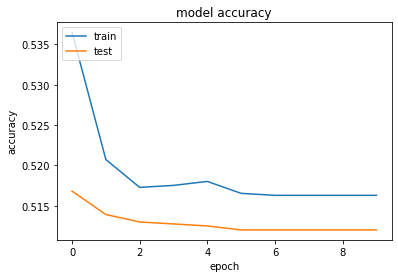

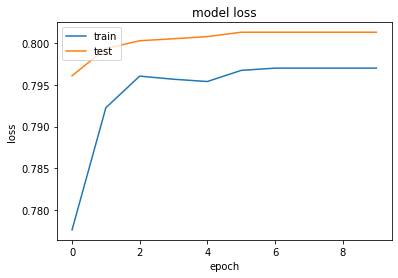

In [ ]:
#plot history 
#plot accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:

history2 = model2.fit(data_shuffled,labels_shuffled,batch_size=100,epochs=10,verbose=1, validation_split = .8)

Epoch 1/10


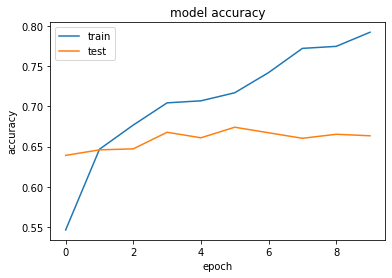

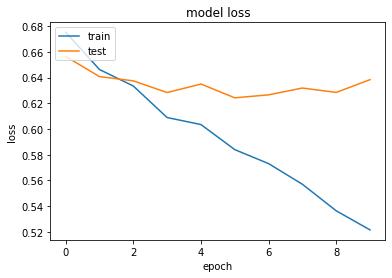

In [ ]:
#plot history 
#plot accuracy
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# plot loss
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Save Model Weights

In [ ]:
model.save('/content/drive/My Drive/NLP Final/' + filename)
model2.save('/content/drive/My Drive/NLP Final/' + filename2)



Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/My Drive/NLP Final/model_train2000/assets
